Sistemas Inteligntes - IF684EC
# Miniprojeto Multilayer Perceptrons

<p align="justify">
O projeto tem como objetivo introduzir a implementação de redes MLP (Multiplas camadas de Perceptron) e verificar o impacto de alguns parâmetros, como o numero de camadas e o ritmo de aprendizagem, nas métricas finais.

### Equipe:
> Jeferson Severino de Araújo (jsa2)

> Lucas Nascimento Brandão (lnb)

> Matheus Julío Boncsidai de Oliveira (mjbo)

> Pedro Henrique Almeida Girão Peixinho (phagp)

> Victor Gabriel de Carvalho (vgc3)

## Dataset
<p align="justify">
A dor lombar pode ser causada por uma variedade de problemas que podem ocorrer em qualquer parte da rede complexa e interconectada de músculos, nervos, ossos, discos ou tendões da coluna lombar. Fontes típicas de dor lombar incluem:

> As raízes nervosas na região lombar que vão para as pernas podem estar irritadas.

> Os nervos menores que suprem a região lombar podem estar irritados.

> Os pares de músculos inferiores das costas (eretores da espinha) podem ser tensos.

> Os ossos, ligamentos ou articulações podem ser danificados.

> Um disco intervertebral pode estar degenerando.

<p align="justify">
Uma irritação ou problema em qualquer uma dessas estruturas pode causar dor lombar e/ou dor que irradia ou se refere a outras partes do corpo. Muitos problemas na parte inferior das costas também causam espasmos musculares nas costas, que não parecem muito, mas podem causar dor intensa e incapacidade.
<p align="justify">
Embora a dor lombar seja extremamente comum, os sintomas e a gravidade da dor lombar variam muito. Uma simples tensão muscular na parte inferior das costas pode ser insuportável o suficiente para exigir uma visita ao pronto-socorro, enquanto um disco em degeneração pode causar apenas um desconforto leve e intermitente.
<p align="justify">
Este conjunto de dados está prestes a identificar se uma pessoa é anormal ou normal usando detalhes/dados físicos da coluna vertebral coletados.
<p align="justify">
O dataset é composto por 310 observações, cada uma com 13 atributos (12 preditores numéricos, 1 atributo de classe binária). Os atributos são:

> Incidência pélvica - inclinação pélvica - Ângulo da lordose lombar

> Inclinação sacral - Raio pélvico - Grau de espondilolistese

> Declive pélvico - Inclinação direta - Declive torácico

> Inclinação cervical - Ângulo sacro - Inclinação da escoliose

Link: https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset




---



## Implementação

### Imports
<p align="justify">
Será necessário o uso da biblioteca Pandas para uma melhor manipulação e tratamento dos dados. Além do Matplotlib para a sua visualização.

Ademais, utilizaremos os seguintes módulos SKLearn:

> MLPClassifier, que será nosso modelo MLP

> train_test_split, para devidir eficientemente o dataset

> MinMaxScaler, para escalorar os dados e garantir um melhor resultado

> classification_report e confusion_matrix, para imprimir as métricas detalhadas

<p align="justify">
Por estamos implementando pelo Collab, necessitamos do drive do google.colab para acessar nosso dataset na núvem.

A utilização de cada uma será melhor explicada posteriormente.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




---



### Data Exploration
<p align="justify">
Como já mencionado, temos 310 amostras de dados com 13 atributos cada. Tudo está armazenado em um arquivo csv. Será usada a função 'read_csv', que retornará um DataFrame Pandas.

In [2]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Sistemas Inteligentes/Miniprojeto MLP/Dataset_spine.csv')

dataset.shape

(310, 14)

Aqui utilizaremos o método 'head' para mostras as primeiras 5 linhas (amostras) dos datasets. Essa visualização ajuda a vermos o estado inicial dos dados.

In [3]:
dataset.head()  # As primeiras 5 amostras

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
dataset.sample(10)  # Dez amostas aleatórias

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,0.021178,18.7846,8.0070,9.74352,-1.228604,14.2547,Normal,NaN
139,85.095503,21.069897,91.734792,64.025606,109.062312,38.032831,0.481862,17.1681,8.4727,11.98150,-25.387556,8.3163,Abnormal,NaN
195,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,0.506379,23.0527,15.2430,14.14875,-19.895641,8.6239,Abnormal,NaN
104,77.409333,29.396545,63.232302,48.012788,118.450731,93.563737,0.375287,11.2385,12.9197,13.82148,6.079425,11.8698,Abnormal,NaN
32,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620,0.816748,27.5218,13.8357,13.54721,-2.925586,36.0452,Abnormal,NaN
149,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,0.672570,29.0324,14.5804,16.56784,-0.269590,31.7726,Abnormal,NaN
34,59.595540,31.998244,46.560252,27.597296,119.330354,1.474286,0.477088,8.6051,8.3058,8.53700,-0.029028,40.5823,Abnormal,NaN
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,0.371351,21.1136,7.1646,9.82029,-6.841914,11.6156,Abnormal,NaN
225,59.726140,7.724873,55.343485,52.001268,125.174221,3.235159,0.080219,26.2021,8.7872,7.46821,3.916838,43.4384,Normal,NaN
148,65.755679,9.832874,50.822895,55.922805,104.394959,39.307212,0.081033,35.6242,7.4483,12.13128,-5.163605,43.2649,Abnormal,NaN


<p align="justify">
O código abaixo cria um conjunto de gráficos de histograma para visualizar a frequência da distribuição de dados em cada uma das colunas do dataset. Esses gráficos são úteis para entender a distribuição dos dados e podem ajudar a identificar tendências, outliers e outras características dos seus dados.

> <p align="justify"> Vale salientar que as duas ultimas colunas foram excluídas dessa análise, por se tratar dos labels ou de valores irrelevantes.

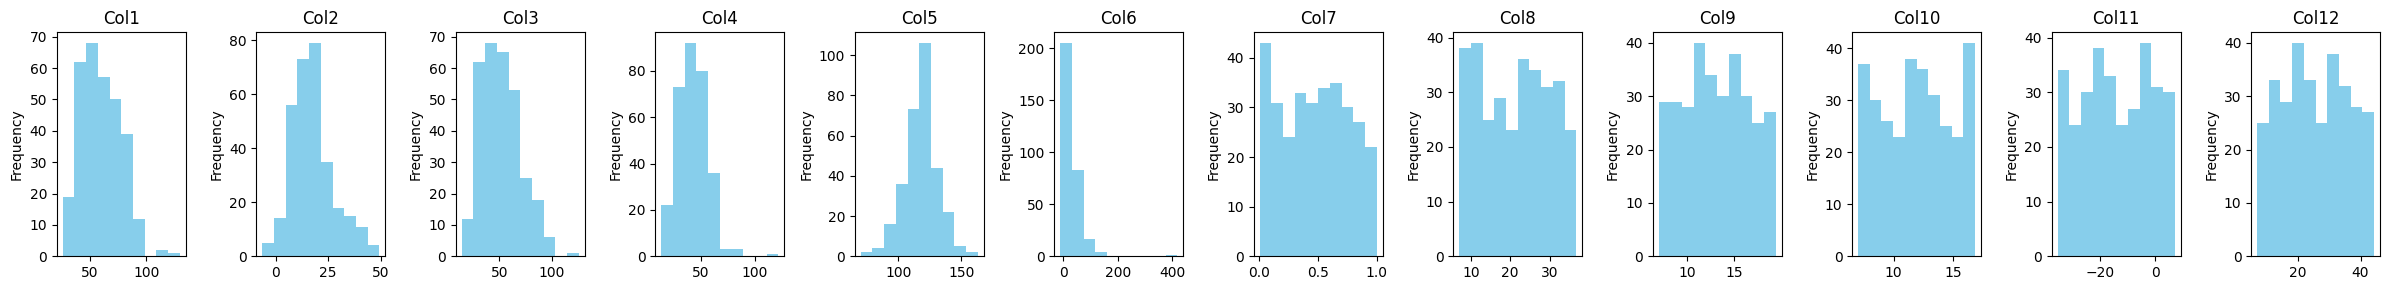

In [5]:
columns = dataset.columns[:-2]

# Cria subplots com o mesmo número de colunas (atributos) no dataset
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(24, 3))  # Adjust figsize as needed

# Cria um plot histrograma para cada coluna
for i, col in enumerate(columns):
    dataset[col].plot(kind='hist', ax=axes[i], bins=10, color='skyblue')
    axes[i].set_title(col)

plt.tight_layout()  # Espaçamento entre subplots
plt.show()

<p align="justify">
Semelhantemente, o trecho a segur cria um gráfico de barras para visualizar as médias dos valores de cada coluna. Permitindo uma rápida visualização das tendências centrais dos dados em cada coluna.

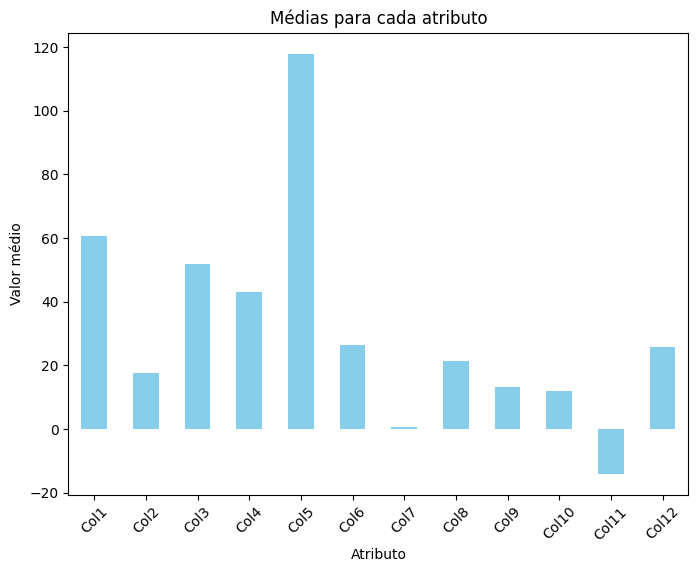

In [6]:
column_means = dataset.mean(numeric_only=True)

# Plota as médias de cada atributo
plt.figure(figsize=(8, 6))
column_means.plot(kind='bar', color='skyblue')
plt.title('Médias para cada atributo')
plt.xlabel('Atributo')
plt.ylabel('Valor médio')
plt.xticks(rotation=45)
plt.show()

<p align="justify">
Finalmente, O código a seguir calcula as médias de cada coluna para cada classe no dataset (Normal ou Abnormal), e cria um gráfico de barras para visualizar as médias por classe para cada coluna.

> <p align="justify"> Nesse caso, utilizamos os labels.

<Figure size 1200x600 with 0 Axes>

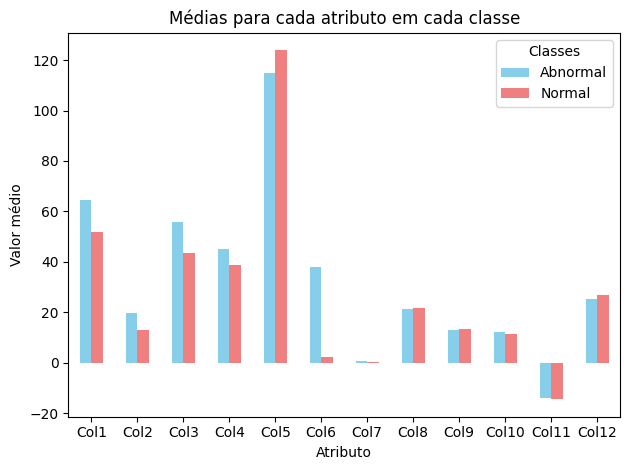

In [7]:
# Calcula a média de cada coluna para cada classe
means_by_class = dataset.groupby('Class_att').mean(numeric_only=True)

# Transpõe o dataset
means_by_class = means_by_class.transpose()

# Plota as médias para cada classe
plt.figure(figsize=(12, 6))
means_by_class.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Médias para cada atributo em cada classe')
plt.xlabel('Atributo')
plt.ylabel('Valor médio')
plt.xticks(rotation=0)
plt.legend(title='Classes', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<p align="justify">
Aqui abaixo está um exemplo do agrupamento acima, porém com apenas um atribulo, permitindo uma visualização mais detalhada.

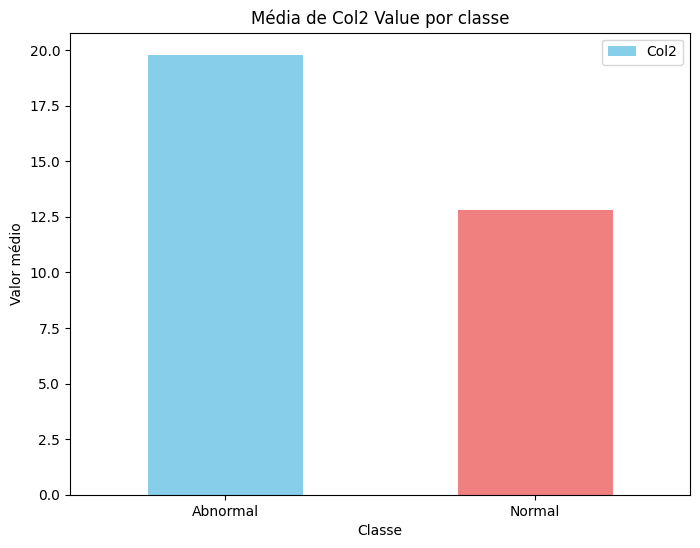

In [8]:
# Calcula a média de Col2 para cada classe
class_means = dataset.groupby('Class_att')['Col2'].mean()

# Plota as médias de Col 2 para cada classe
plt.figure(figsize=(8, 6))
class_means.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Média de Col2 Value por classe')
plt.xlabel('Classe')
plt.ylabel('Valor médio')
plt.xticks(rotation=0)
plt.legend()
plt.show()

Agora, usaremos a representação de box plot para representarmos a distribuição de amostras dentro de cada atributo. Isso ajudaria a identificar valores anômalos (outliers) que não possuem considrável importância estatística. Esses valores serão removidos posteriormente.

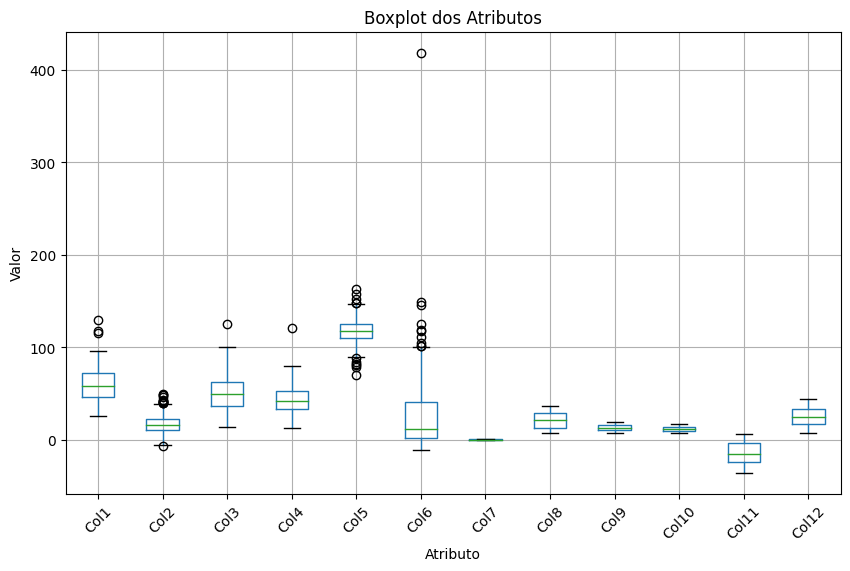

In [9]:
numerical_attributes = dataset.drop(columns=['Class_att', 'Unnamed: 13'])

# Create a boxplot for the numerical attributes
plt.figure(figsize=(10, 6))
numerical_attributes.boxplot()
plt.title('Boxplot dos Atributos')
plt.xlabel('Atributo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

---

### Data Cleaning
<p align="justify">
Antes prosseguirmos com a classificação, precisamos fazer uma limpesa nos dados, eliminando valores irrelevenates ou que possam prejudicar o modelo. No caso desse dataset, devemos remover a coluna 13 (que possui apenas algumas informações sobre os dados e a maioria das linhas é NaN).

In [10]:
dataset = dataset.drop("Unnamed: 13", axis=1)  # Removendo coluna desnecessária

dataset.sample(5)  # Cinco amostas aleatórias

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
43,66.285394,26.327845,47.500000,39.957549,121.219684,-0.799624,0.647626,9.0466,10.2636,13.50349,1.138079,34.3683,Abnormal
161,67.263149,7.194661,51.696887,60.068488,97.801085,42.136943,0.936623,17.7459,9.6738,7.23554,-32.437830,33.0292,Abnormal
287,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,0.167309,17.1960,11.2466,9.14463,-29.114560,40.9249,Normal
240,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538,0.098119,10.0549,8.7771,8.64451,-5.079724,29.4263,Normal
216,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,0.038359,35.6096,13.0974,12.04558,-9.237245,31.7220,Normal


<p align="justify">
Também devemos mudar os atributos de classe nominais "Normal" e "Abnormal" para 0 e 1, respectivamente, para que o modelo possa prever uma das duas classes.

In [11]:
dataset['Class_att'] = dataset['Class_att'].replace({'Abnormal': 1, 'Normal': 0})  # Redefinindo classes para 0 (normal) or 1 (abnormal)

dataset.sample(5)  # Cinco amostas aleatórias

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
216,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,0.038359,35.6096,13.0974,12.04558,-9.237245,31.7220,0
35,31.484218,7.826221,24.284818,23.657997,113.833145,4.393080,0.713153,9.7107,8.1003,11.85555,-26.650369,12.6599,1
127,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,0.095806,26.7780,18.2886,11.96597,-25.207568,21.5450,1
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,0.972556,18.2046,16.9817,12.32724,-26.375211,14.1334,1
236,61.821627,13.597105,64.000000,48.224523,121.779803,1.296191,0.629661,17.9906,13.6082,8.34518,-10.939434,20.7594,0


Eliminando registros sem valores (não ocorre nesse dataset)

In [12]:
dataset.shape

(310, 13)

In [13]:
dataset.dropna()
dataset.shape

(310, 13)

Iremos agora eliminar os outliers identificados na fase de exploração de dados.

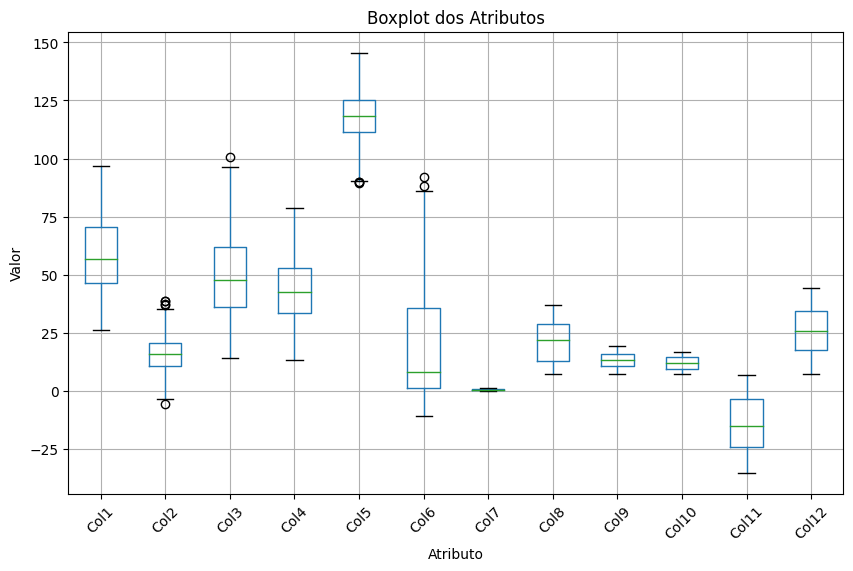

In [14]:
for col in dataset.columns:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

numerical_attributes = dataset.drop(columns=['Class_att'])

# Create a boxplot for the numerical attributes
plt.figure(figsize=(10, 6))
numerical_attributes.boxplot()
plt.title('Boxplot dos Atributos')
plt.xlabel('Atributo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

<p align="justify">
Agora, vamos dividir o dataset entre as colunas de entrada e a coluna de saída (classes a ser prevista).

In [15]:
dataset_X = dataset.drop('Class_att', axis=1)  # Dividindo dataset em entradas e saídas (X e y)
dataset_y = dataset['Class_att']

dataset_y.sample(5)  # Cinco amostas aleatórias

251    0
306    0
257    0
256    0
301    0
Name: Class_att, dtype: int64

---

### Data Balancing
<p align="justify">
Deixaremos o dataset mais balanceado gerando amostras sintéticas até as duas classes terem número igual amostras. O SMOTE usa o algorítmo dos "K vizinhos mais próximos" para gerar novas amostras.

In [16]:
smote = SMOTE(sampling_strategy='minority', random_state=9)
dataset_X, dataset_y = smote.fit_resample(dataset_X, dataset_y)

dataset_X.shape, dataset_y.shape

((354, 12), (354,))

---

### Data Scaling
<p align="justify">
Escalonar os valores do dataset para um intervalo entre 0 e 1 melhora a perfórmace e constância do modelo.

In [17]:
scaler = MinMaxScaler()  # Scalling data (ente 0 e 1)
dataset_X[dataset_X.columns] = scaler.fit_transform(dataset_X[dataset_X.columns])

dataset_X.sample(5)  # Cinco amostas aleatórias

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
99,0.535428,0.438423,0.554784,0.562878,0.439297,0.509102,0.715704,0.600480,0.781950,0.966884,0.795202,0.183508
176,0.313604,0.499218,0.257414,0.282383,0.096394,0.382226,0.386924,0.307922,0.653237,0.693455,0.644654,0.390211
14,0.257710,0.412228,0.254758,0.281443,0.617219,0.159809,0.663737,0.083289,0.987921,0.023218,0.056637,0.335370
96,0.741434,0.880603,0.717943,0.483486,0.874452,0.855730,0.579932,0.996117,0.780437,0.095819,0.382501,0.243439
31,0.266472,0.522233,0.158864,0.215903,0.507908,0.161301,0.817118,0.689668,0.553296,0.668078,0.765788,0.777416


---

### Data Split
<p align="justify">
Agora é a hora de dividir o dataset entre teste e teinamento. Usaremos a função train_test_split da biblioteca SKLearn para tal. Definimos 80% dos dados para treinameno e 20% para teste.

> Definimos um valor arbitrário para o argumento 'random_state'. Ele fará o dataset ser dividido igualmente em todas as execuções, facilitando a comparação entre modelos e a constância dos resultados. Especialmente em um cenário com poucas amostras.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.2, random_state=9)  # Criando train e test splits

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((283, 12), (71, 12), (283,), (71,))

---

### Modelo 1
<p align="justify">
Usaremos a classe MLPClassifier, novamente do SKLearn, como modelo MLP. Nessa primeira abordagem, manteremos os argumentos padrões da função. Posteriormente, os valores seráo alterados.

> Note que também usaremos o 'random_state' nessas implementações.

In [19]:
model1 = MLPClassifier(random_state=9).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


A segur, temos o teste do modelo em dados ainda não vistos pelo treinamento.

In [20]:
model1.score(X_test, y_test)

0.8169014084507042

<p align="justify">
Com o auxílio do método classification_report, podemos ter uma visão detalhada das métricas do modelo.

> <p align="justify"> Precisão (Precision): A precisão mede a proporção de exemplos positivos previstos corretamente em relação a todos os exemplos previstos como positivos. Em outras palavras, é a capacidade do modelo de evitar falsos positivos.

> <p align="justify"> Revocação (Recall): A revocação (também conhecida como taxa de verdadeiros positivos ou sensibilidade) mede a proporção de exemplos positivos previstos corretamente em relação a todos os exemplos que realmente são positivos. Em outras palavras, é a capacidade do modelo de evitar falsos negativos.

> <p align="justify"> F1-Score: O F1-Score é uma métrica que combina precisão e revocação em uma única medida. Ele é útil quando você deseja um equilíbrio entre precisão e revocação e não quer se concentrar apenas em uma delas. O F1-Score é a média harmônica entre precisão e revocação.

> <p align="justify"> Suporte (Support): O suporte é o número de ocorrências reais de cada classe no conjunto de dados. É o número total de exemplos que pertencem a uma classe específica. O suporte é importante para entender se o modelo está sendo testado em um conjunto de dados balanceado ou desbalanceado.

> <p align="justify"> Acurácia (Accuracy): A acurácia é a métrica mais simples e amplamente usada. Ela mede a proporção de exemplos corretamente classificados em relação ao total de exemplos. No entanto, a acurácia pode ser enganosa em conjuntos de dados desbalanceados, onde uma classe é dominante.

In [21]:
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        34
           1       0.85      0.78      0.82        37

    accuracy                           0.82        71
   macro avg       0.82      0.82      0.82        71
weighted avg       0.82      0.82      0.82        71



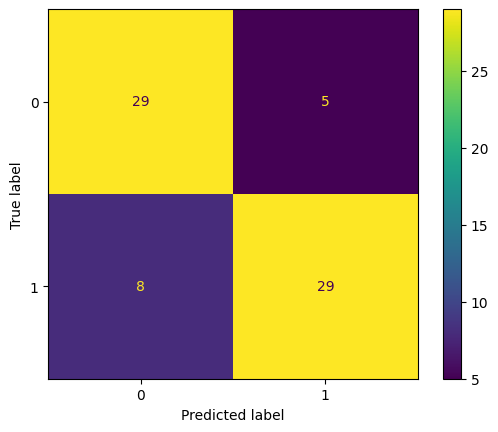

In [22]:
cm1 = confusion_matrix(y_test, y_pred1, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=None)
disp.plot()

###Modelo 2
Aumentaremos o número de iterações (épocas)

In [23]:
model2 = MLPClassifier(random_state=9,
                       max_iter=500).fit(X_train, y_train)
model2.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8309859154929577

In [24]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.82      0.86      0.84        37

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



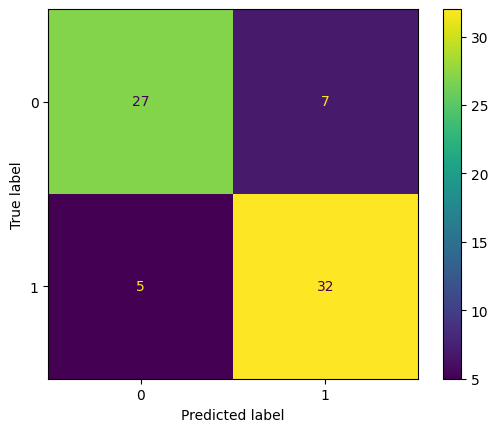

In [25]:
cm2 = confusion_matrix(y_test, y_pred2, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=None)
disp.plot()

### Modelo 3
Aumentaremos o número de neurônios na i-ésima camada oculta e, novamente, as épocas

In [26]:
model3 = MLPClassifier(random_state=9,
                       hidden_layer_sizes=(500,),
                       max_iter=1000).fit(X_train, y_train)
model3.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8309859154929577

In [27]:
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.82      0.86      0.84        37

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



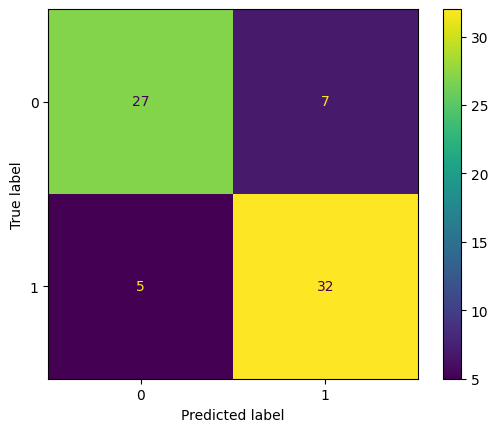

In [28]:
cm3 = confusion_matrix(y_test, y_pred3, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=None)
disp.plot()

### Modelo 4
Learning Rate inicial menor e adaptativa, com mais épocas.

In [29]:
model4 = MLPClassifier(random_state=9,
                       hidden_layer_sizes=(500,),
                       max_iter=1000,
                       learning_rate='adaptive',
                       learning_rate_init=0.0001).fit(X_train, y_train)
model4.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8309859154929577

In [30]:
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        34
           1       0.86      0.81      0.83        37

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



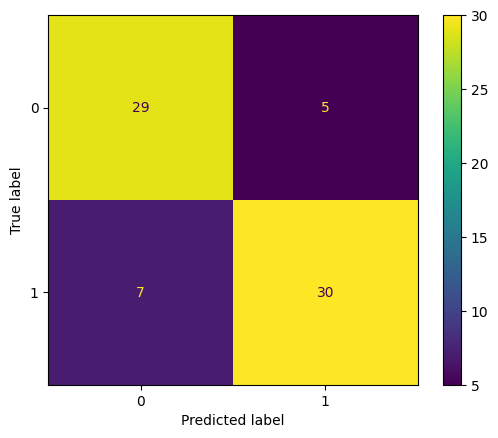

In [31]:
cm4 = confusion_matrix(y_test, y_pred4, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=None)
disp.plot()

### Modelo 5
Aumentaremos o ainda mais número de neurônios na i-ésima camada oculta e, novamente, as épocas (como no modelo 3)

In [32]:
model5 = MLPClassifier(random_state=9,
                       hidden_layer_sizes=(700,),
                       max_iter=1000).fit(X_train, y_train)
model5.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8450704225352113

In [33]:
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        34
           1       0.82      0.89      0.86        37

    accuracy                           0.85        71
   macro avg       0.85      0.84      0.84        71
weighted avg       0.85      0.85      0.84        71



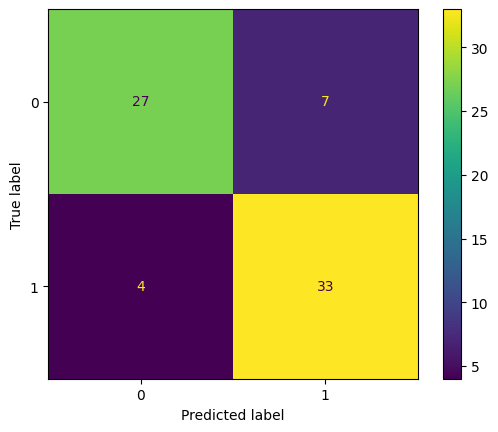

In [34]:
cm5 = confusion_matrix(y_test, y_pred5, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=None)
disp.plot()

### Procurando o melhor modelo

Em busca de varrer varios setups e achar o melhor modelo entre eles, usamos GridSearch.

In [35]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

params = {'random_state': [9],
          'hidden_layer_sizes': [(100,), (200,), (500,), (700,)],
          'max_iter': [200, 500, 1000, 2000],
          'learning_rate': ['constant', 'adaptive'],
          'learning_rate_init': [0.001, 0.005, 0.0001]}

grid_search = GridSearchCV(MLPClassifier(), param_grid=params, cv = 5)
grid_search.fit(X_train, y_train)
cv_best_params = grid_search.best_params_

model6 = MLPClassifier()
model6.set_params(random_state = cv_best_params['random_state'],
                  hidden_layer_sizes = cv_best_params['hidden_layer_sizes'],
                  max_iter = cv_best_params['max_iter'],
                  learning_rate = cv_best_params['learning_rate'],
                  learning_rate_init = cv_best_params['learning_rate_init'])
model6.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200,), learning_rate_init=0.005,
              random_state=9)

In [36]:
model6.score(X_test, y_test)

0.8591549295774648

In [37]:
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.85      0.89      0.87        37

    accuracy                           0.86        71
   macro avg       0.86      0.86      0.86        71
weighted avg       0.86      0.86      0.86        71



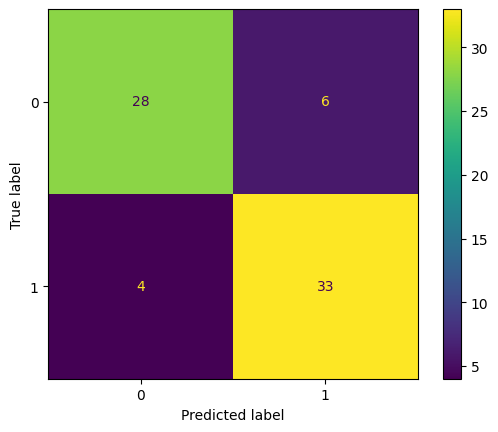

In [38]:
cm6 = confusion_matrix(y_test, y_pred6, labels=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=None)
disp.plot()

---

## Conclusões
<p align="justify">
Analisando os resultados dos seis modelos, podemos perceber que o que se saiu melhor em relação às métricas adotadas foi o Modelo 6. Enquanto os modelos 1 e 2 pareceram não conseguir extrair as características necessárias, devido ao número reduzido de camadas, os modelos 3, 4 e 5 podem ter sofrido overfittng ou estagnado em ritmos de aprendizado baixos demais. O modelo 6 utilizou a estratégia de grid search para buscar os melhores parâmetros que resultassem no melhor modelo.